In [1]:
from PIL import Image
from io import BytesIO
import os, sys, requests, json, random, math, imageio, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
sys.path.append('../preprocessing')
from utility import crop_img

In [2]:
phase_count = {
    "train": 1,
    "test": 1
}

In [ ]:
# get images from pf_ext
# labels = os.path.join('Pf_ext_01.json')

count = 1

phase = "train"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf-ext-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 20:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
            elif lbl == "1":
                lbl = "0"
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

In [ ]:
print(phase_count["train"])

In [ ]:
# get image from pf_01
# labels = os.path.join('pf_01.json')
count = 1
# degs = [45,90,135,180,225,270,315]
data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_01-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 820:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

In [ ]:
print(phase_count["train"])

1 https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test/16.jpg
pf-test-0000000001


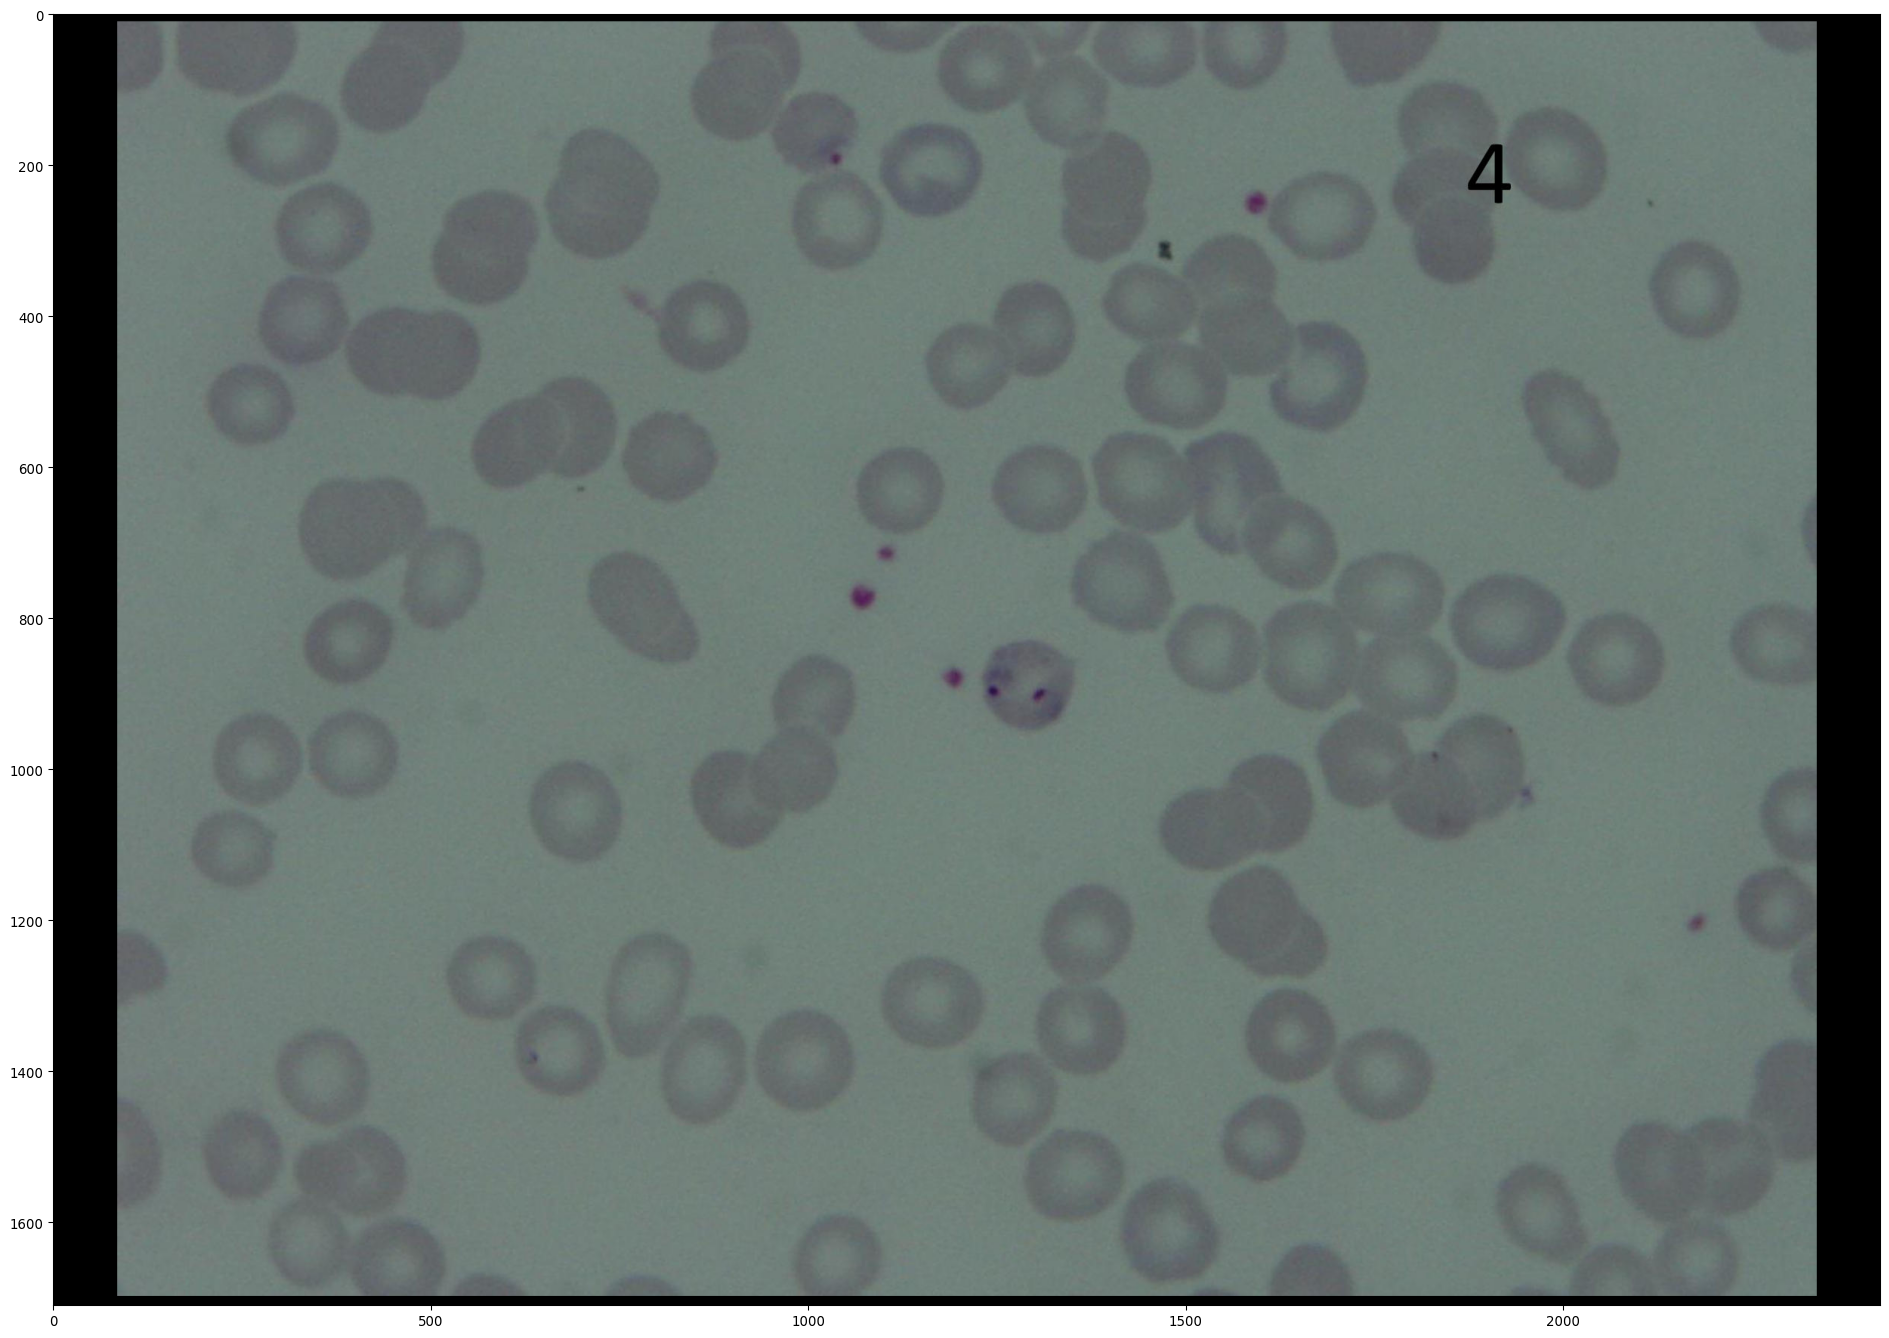

In [9]:
# get image from pf_test
# labels = os.path.join('pf_test.json')

count = 1

phase = "test"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        # print("{} {}".format(w,h))
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        img_pad, bbs_pad = iaa.PadToFixedSize(width=(w + (w % 416)), height=(h + (h % 416)), pad_mode='constant', position="center")(image=img, bounding_boxes=bbs)
        ia.imshow(img_pad)
        break
        # count += 1
        # phase_count[phase] += 1

In [ ]:
# get image from pf_02 (Test set)
# labels = os.path.join('pf_02.json')

count = 1

phase = "test"
degs = [45,90,135,180,225,270,315]

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_02.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 100:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        phase_count[phase] += 1
    count += 1